# Install Requirements

- numpy
- opencv-python
- scikit-learn
- pandas
- matplotlib
- seaborn


In [ ]:
# IF Run in vscode
%pip install numpy opencv-python scikit-learn pandas matplotlib seaborn

# IF Run in Juypyter notebook or google collab
# !pip install numpy opencv-python scikit-learn pandas matplotlib seaborn

# Import Library


In [59]:
import cv2 
import numpy as np
import pandas as pd
import os
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# Persiapan Dataset

- Extrak Gambar ke HSV
- Hitung HSV mean dan standard deviasi
- simapn ke dataframe
- normalisasi

In [60]:
data_train = os.path.join("./dataset","training")
data_test = os.path.join("./dataset","test")

print(os.listdir(data_train))


def exractToHSV(img):
    image = cv2.imread(img)
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h_mean = np.mean(img_hsv[:,:,0])
    s_mean = np.mean(img_hsv[:,:,1])
    v_mean = np.mean(img_hsv[:,:,2])
    h_std = np.std(img_hsv[:,:,0])
    s_std = np.std(img_hsv[:,:,1])
    v_std = np.std(img_hsv[:,:,2])
    return [h_mean,s_mean, v_mean,h_std,s_std,v_std]


def loadData(path, classes):
    features = []
    label = []

    for kelas in classes:
        path_kelas = os.path.join(path,kelas)
        for img_name in os.listdir(path_kelas):
            img_path = os.path.join(path_kelas,img_name)
            img_extract = exractToHSV(img_path)
            features.append(img_extract)
            label.append(kelas)

    df = pd.DataFrame(features, columns=['h_mean','s_mean','v_mean','h_std','s_std','v_std'])
    df['label'] = label
    return df


classes = ['merah','kuning','hijau']

df_train = loadData(data_train, classes)
df_test = loadData(data_test, classes)

print("jumlah dataset training : \n", len(df_train))
print("dataset training : \n", df_train.head(5))
print()
print("jumlah dataset testing : \n", len(df_test))
print("dataset test : \n", df_test.head(5))


features_train = df_train[['h_mean','s_mean','v_mean','h_std','s_std','v_std']]
label_train = df_train['label']

features_test = df_test[['h_mean','s_mean','v_mean','h_std','s_std','v_std']]
label_test = df_test['label']

# Normalisasi
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)


print("hasil scaled : \n",features_train_scaled[:5])
print("Rentang features:", features_train_scaled.min(), features_train_scaled.max())

['hijau', 'kuning', 'merah']
jumlah dataset training : 
 1635
dataset training : 
     h_mean    s_mean    v_mean      h_std       s_std      v_std  label
0   8.5906  120.7174  163.6420  19.046763   90.863743  72.777596  merah
1  10.1583  119.5203  157.2010  19.331959   88.309469  74.672950  merah
2  97.4170  155.8205  128.0427  82.846791  109.605216  78.080519  merah
3  99.5235  155.7501  128.3340  82.385385  109.434309  77.960796  merah
4  99.5284  155.6957  128.2147  82.341211  109.441080  78.036784  merah

jumlah dataset testing : 
 61
dataset test : 
     h_mean    s_mean    v_mean      h_std      s_std      v_std  label
0  15.1292  128.0454  163.5837  41.459027  95.341925  69.774593  merah
1   8.4293  122.2862  165.5620  22.399179  93.224777  71.068588  merah
2   8.3884  122.0738  165.1051  21.124094  93.140811  71.704921  merah
3   8.0876  121.7220  165.1785  19.092950  92.852703  72.036717  merah
4   7.8957  121.3605  164.5594  17.895341  92.354522  72.528989  merah
hasil scale

# Proses Model

- Train model KNN.
- Evaluasi model dengan menghitung akurasi.
- Visualisasi Hasil.

In [61]:
class KNN ():
    def __init__(self, k, X_train_scaled, Y_train):
        self.k = k
        self.X_train = np.array(X_train_scaled)
        self.Y_train = np.array(Y_train)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    def predict (self, X_test):
        X_test = np.array(X_test)
        predictions = []
        for x in X_test:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = [self.Y_train[i]for i in k_indices]
            most_common = Counter(k_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)
        

knn = KNN(5,features_train_scaled,label_train)
pred = knn.predict(features_test_scaled)


print("Model Accuracy : ",accuracy_score(label_test, pred))
print(f"Model Classification report : \n{classification_report(label_test, pred)}")
cm = confusion_matrix(label_test, pred)
print(cm)


print()


knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(features_train_scaled, label_train)
pred_sklearn = knn_sklearn.predict(features_test_scaled)

print("Scikit-learn KNN Accuracy:", accuracy_score(label_test, pred_sklearn))
print("Scikit-learn KNN Classification Report:\n", classification_report(label_test, pred_sklearn, zero_division=0))

classes = ['hijau', 'kuning', 'merah']
cm_sklearn = confusion_matrix(label_test, pred_sklearn, labels=classes)
print(cm_sklearn)


Model Accuracy :  0.9672131147540983
Model Classification report : 
              precision    recall  f1-score   support

       hijau       1.00      1.00      1.00        20
      kuning       1.00      0.90      0.95        20
       merah       0.91      1.00      0.95        21

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

[[20  0  0]
 [ 0 18  2]
 [ 0  0 21]]

Scikit-learn KNN Accuracy: 0.9672131147540983
Scikit-learn KNN Classification Report:
               precision    recall  f1-score   support

       hijau       1.00      1.00      1.00        20
      kuning       1.00      0.90      0.95        20
       merah       0.91      1.00      0.95        21

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

[[20  0  0]
 [ 0 18  2]
 [ 0  0 21]]


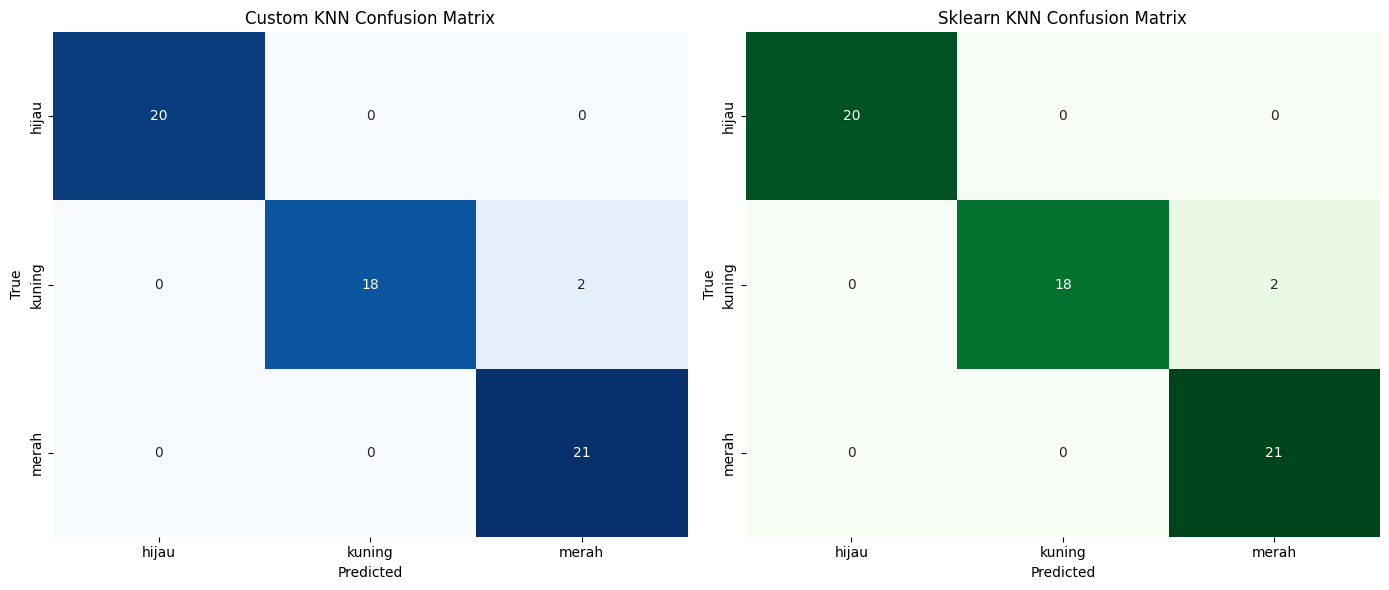

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Custom KNN
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            ax=axes[0], xticklabels=['hijau', 'kuning', 'merah'], yticklabels=['hijau', 'kuning', 'merah'])
axes[0].set_title('Custom KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Sklearn KNN
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Greens', cbar=False,
            ax=axes[1], xticklabels=['hijau', 'kuning', 'merah'], yticklabels=['hijau', 'kuning', 'merah'])
axes[1].set_title('Sklearn KNN Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

# Simpan Model

In [69]:
joblib.dump(knn_sklearn, './model/knn_model.pkl')
joblib.dump(scaler, './model/scaler.pkl')


knn_loaded = joblib.load('./model/knn_model.pkl')
scaler_loaded = joblib.load('./model/scaler.pkl')


pred = knn_loaded.predict(features_test_scaled)
print(pred[1])
print(accuracy_score(label_test, pred))

merah
0.9672131147540983


Confusion Matrix:
 [[21  0  0]
 [ 2 18  0]
 [ 0  0 20]]
Akurasi Model: 96.72%


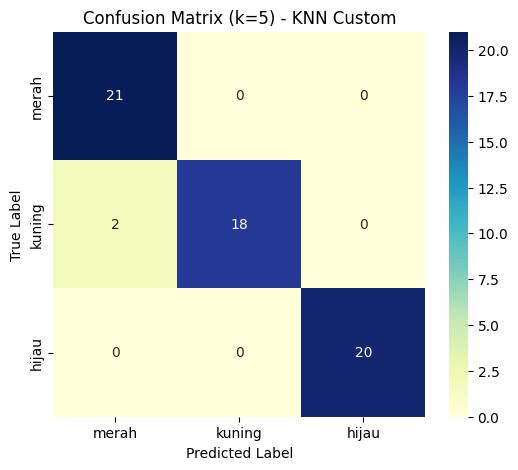

In [42]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict_knn(x_train, y_train, x_test, k=5):
    hasil_prediksi = []
    for data_uji in x_test:
        jarak_semua = []
        for idx, data_latih in enumerate(x_train):
            jarak = euclidean_distance(data_uji, data_latih)
            jarak_semua.append((jarak, y_train[idx]))
        jarak_semua.sort(key=lambda x: x[0])
        tetangga = jarak_semua[:k]
        suara = {}
        for _, label in tetangga:
            if label not in suara:
                suara[label] = 0
            suara[label] += 1
        prediksi = sorted(suara.items(), key=lambda x: x[1], reverse=True)[0][0]
        hasil_prediksi.append(prediksi)
    return hasil_prediksi

def confusion_matrix_manual(y_true, y_pred, labels):
    matriks = np.zeros((len(labels), len(labels)), dtype=int)
    label_ke_index = {label: idx for idx, label in enumerate(labels)}
    for benar, prediksi in zip(y_true, y_pred):
        i = label_ke_index[benar]
        j = label_ke_index[prediksi]
        matriks[i][j] += 1
    return matriks

k = 5
y_prediksi = predict_knn(features_train_scaled, label_train.values, features_test_scaled, k)

labels = ['merah', 'kuning', 'hijau']
conf_matrix = confusion_matrix_manual(label_test.values, y_prediksi, labels)

print("Confusion Matrix:\n", conf_matrix)

akurasi = np.sum(np.array(y_prediksi) == label_test.values) / len(label_test)
print(f"Akurasi Model: {akurasi*100:.2f}%")

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (k={k}) - KNN Custom")
plt.show()
